# A comparison of GRNs from biological replicates (TDR118 vs TDR119, both from 15-somites stage, 16hpf)

- Author: Yang-Joon Kim
- last updated: 10/19/2023

## Goals
- (1) comparative analysis on the two GRNs from biological replicates - using the network topology metrics (i.e. degree centrality, etc.)
- (2) [TBD] EDA on other metrics
- (3) [TBD] EDA on the network motifs?

In [1]:
# 0. Import

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
import celloracle as co
co.__version__

/home/yang-joon.kim/.conda/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/yang-joon.kim/.conda/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str

'0.14.0'

In [3]:
# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 600

In [4]:
figpath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/GRN_benchmark_TDR118_TDR119_peaks_CRG-arc/"
os.makedirs(figpath, exist_ok=True)

## Step 1. Import the GRN (Links object)

In [5]:
# import the GRNs (Links objects)
TDR118_GRN = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118_cicero_output/08_TDR118_celltype_GRNs.celloracle.links")
TDR119_GRN = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR119_cicero_output/08_TDR119_celltype_GRNs.celloracle.links")


In [6]:
# extract the network topology scores (i.e. degree_centrality_all)
df_GRN1 = TDR118_GRN.merged_score
df_GRN2 = TDR119_GRN.merged_score

In [8]:
df_GRN1.cluster.unique()

array(['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm',
       'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs',
       'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord',
       'PSM', 'Somites', 'unassigned'], dtype=object)

Text(0.1, 0.9, 'Pearson Correlation: 0.97')

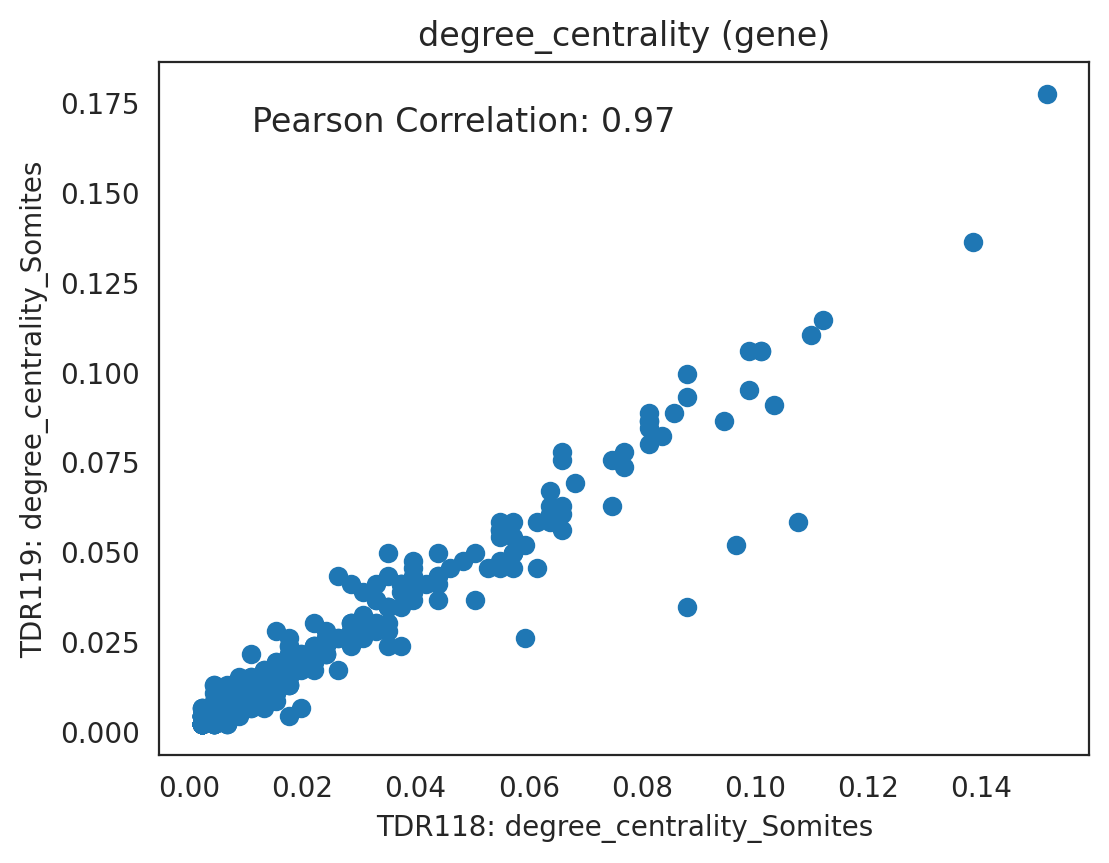

In [10]:
# Check the correlation of "degree_centrality_all" metric 
# per gene between the same cell-types

# subset the dataframes for specific cell-type
celltype1 = "Somites"
celltype2 = "Somites"

df1 = df_GRN1[df_GRN1.cluster==celltype1]
df2 = df_GRN2[df_GRN2.cluster==celltype2]

# Step 1. Get a union of gene_names
gene_names = set(df1.index).union(df2.index)
len(gene_names)

# Step 2. Create a new dataframe with matching indices
new_df1 = df1[df1.index.isin(gene_names)]
new_df2 = df2[df2.index.isin(gene_names)]

# Step 3. Fill missing values with NaNs
new_df1 = new_df1.reindex(gene_names) #fill_value=0
new_df2 = new_df2.reindex(gene_names)

# Step 4. Create the zipped DataFrame
zipped_df = pd.DataFrame({'degree_centrality_all_df1': new_df1['degree_centrality_all'], 'degree_centrality_all_df2': new_df2['degree_centrality_all']})
zipped_df

# Step 5. Generate scatter plots, with Pearson correlation coeff.
plt.scatter(x=zipped_df.degree_centrality_all_df1,
            y=zipped_df.degree_centrality_all_df2)
plt.xlabel("TDR118: degree_centrality_" + celltype1)
plt.ylabel("TDR119: degree_centrality_" + celltype2)
plt.title("degree_centrality (gene)")


# Annotate the plot with the correlation coefficient
corr = zipped_df.degree_centrality_all_df1.corr(zipped_df.degree_centrality_all_df2,
                                                method = "pearson")
plt.annotate(f"Pearson Correlation: {corr:.2f}",
             xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

Text(0.1, 0.9, 'Pearson Correlation: 0.81')

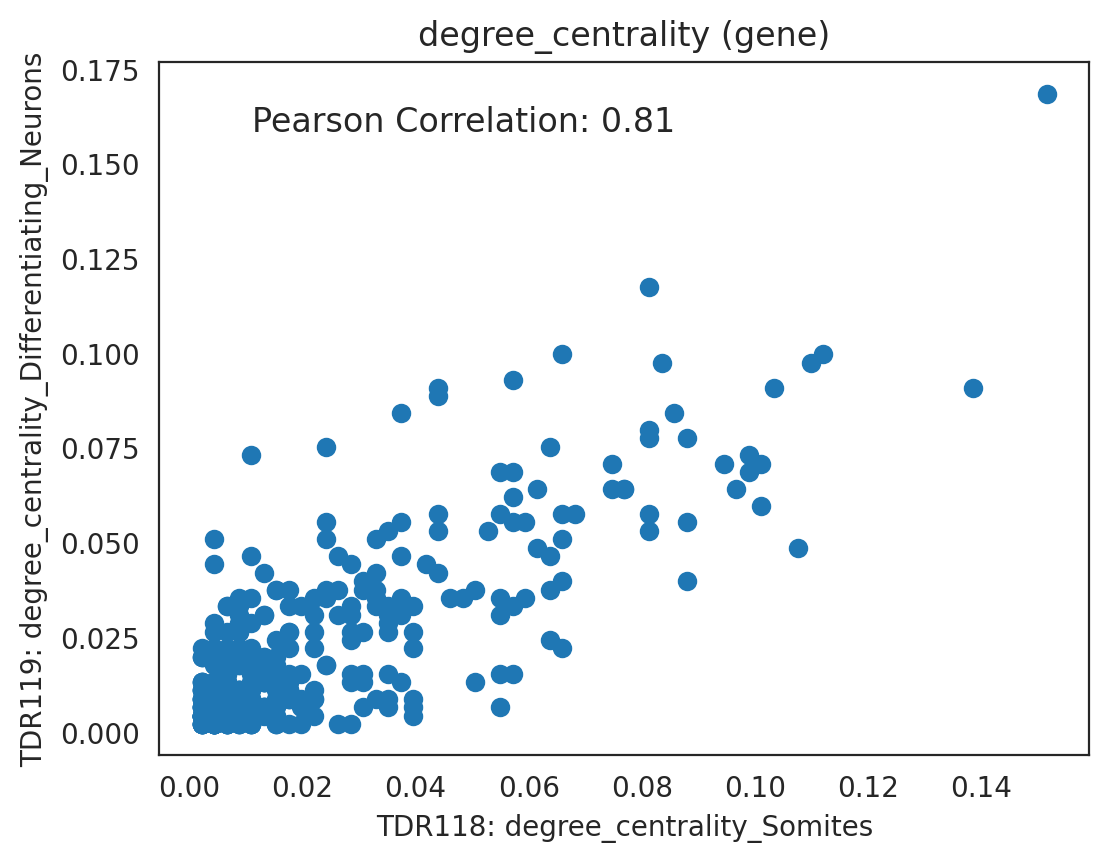

In [9]:
# Check the correlation of "degree_centrality_all" metric 
# per gene between different cell-types

# subset the dataframes for specific cell-type
celltype1 = "Somites"
celltype2 = "Differentiating_Neurons"

df1 = df_GRN1[df_GRN1.cluster==celltype1]
df2 = df_GRN2[df_GRN2.cluster==celltype2]

# Step 1. Get a union of gene_names
gene_names = set(df1.index).union(df2.index)
len(gene_names)

# Step 2. Create a new dataframe with matching indices
new_df1 = df1[df1.index.isin(gene_names)]
new_df2 = df2[df2.index.isin(gene_names)]

# Step 3. Fill missing values with 0
new_df1 = new_df1.reindex(gene_names) #fill_value=0
new_df2 = new_df2.reindex(gene_names)

# Step 4. Create the zipped DataFrame
zipped_df = pd.DataFrame({'degree_centrality_all_df1': new_df1['degree_centrality_all'], 'degree_centrality_all_df2': new_df2['degree_centrality_all']})
zipped_df

# Step 5. Generate scatter plots, with Pearson correlation coeff.
plt.scatter(x=zipped_df.degree_centrality_all_df1,
            y=zipped_df.degree_centrality_all_df2)
plt.xlabel("TDR118: degree_centrality_" + celltype1)
plt.ylabel("TDR119: degree_centrality_" + celltype2)
plt.title("degree_centrality (gene)")


# Annotate the plot with the correlation coefficient
corr = zipped_df.degree_centrality_all_df1.corr(zipped_df.degree_centrality_all_df2,
                                                method = "pearson")
plt.annotate(f"Pearson Correlation: {corr:.2f}",
             xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

## Step 2. Compute the correlation coefficients between the same cell-types and different cell-types

- correlation coefficients of different network metrics (across all genes, that are present in both GRNs - two biological replicates)

In [15]:
# define a function to compute the correlation of network_metrics (per gene) between two GRNs
# GRN1, GRN2: two GRNs (filtered Links object)
# celltype1, celltype2: cell-types
# network_metric: network topology metrics, i.e. degree_centrality_all

def compute_corr_betwn_GRNs(GRN1, GRN2, celltype1, celltype2, network_metric):
    df1 = df_GRN1[df_GRN1.cluster==celltype1]
    df2 = df_GRN2[df_GRN2.cluster==celltype2]

    # Step 1. Get a union of gene_names
    gene_names = set(df1.index).union(df2.index)
    len(gene_names)

    # Step 2. Create a new dataframe with matching indices
    new_df1 = df1[df1.index.isin(gene_names)]
    new_df2 = df2[df2.index.isin(gene_names)]

    # Step 3. Fill missing values with 0
    new_df1 = new_df1.reindex(gene_names) #fill_value=0
    new_df2 = new_df2.reindex(gene_names)

    # Step 4. Create the zipped DataFrame
    zipped_df = pd.DataFrame({'metric_df1': new_df1[network_metric], 'metric_df2': new_df2[network_metric]})
    zipped_df

#     # Step 5. Generate scatter plots, with Pearson correlation coeff.
#     plt.scatter(x=zipped_df.metric_df1,
#                 y=zipped_df.metric_df2)
#     plt.xlabel("TDR118: "+ network_metric + "_" + celltype1)
#     plt.ylabel("TDR119: "+ network_metric + "_" + celltype2)
#     plt.title(network_metric)


    # Annotate the plot with the correlation coefficient
    corr = zipped_df.metric_df1.corr(zipped_df.metric_df2,
                                    method = "pearson")
    return corr

### Step 2-1. degree_centrality_all

- This metric was used by Kamimoto et al., Cell Stem Cell, 2023. So, we will use this metric as our first-pass metric to compare the two GRNs.

In [16]:
# define the cell-types
celltypes = ['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm',
       'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs',
       'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord',
       'PSM', 'Somites', 'unassigned']

# define empty series to save the correlation coefficients
corr_same_celltypes =[]
corr_diff_celltypes = []


for ct1 in celltypes:
    for ct2 in celltypes:
        corr_coeff = compute_corr_betwn_GRNs(df_GRN1, df_GRN2, ct1, ct2, "degree_centrality_all")
        
        if ct1==ct2:
            corr_same_celltypes.append(corr_coeff)
        else:
            corr_diff_celltypes.append(corr_coeff)

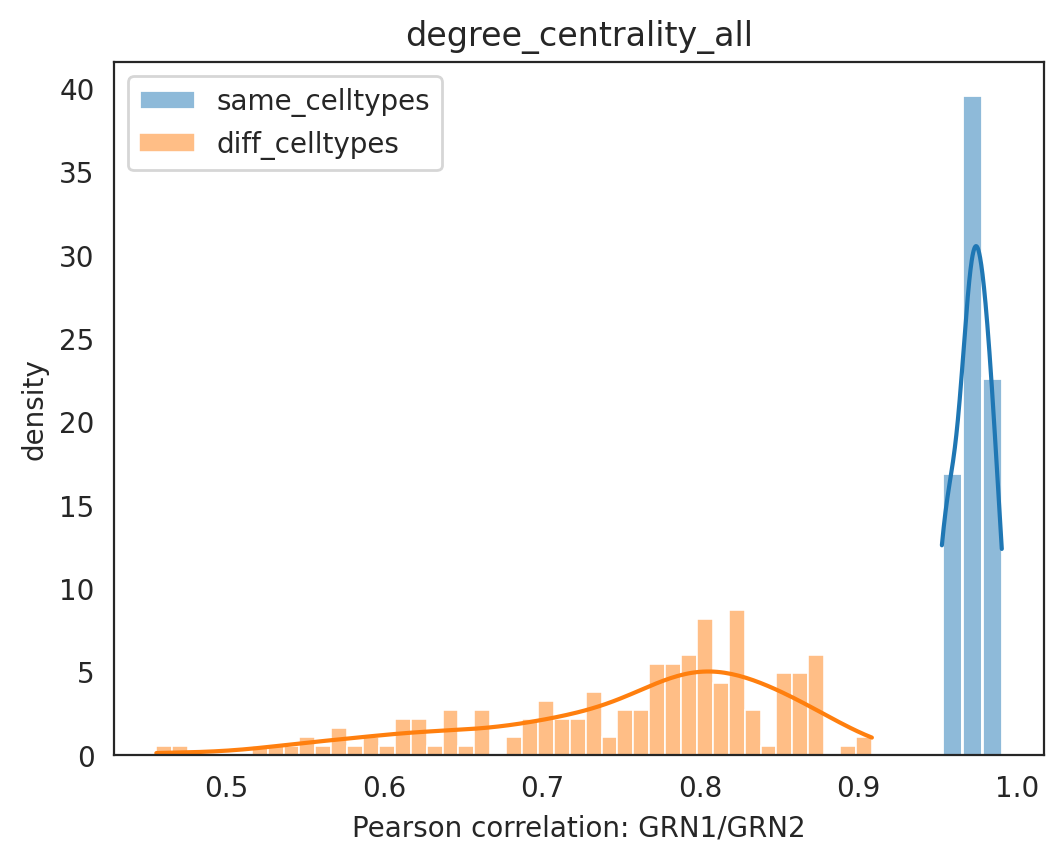

In [17]:
# define the bin width
bin_width = 0.01

# Calculate the number of bins for each histogram
num_bins1 = int((max(corr_same_celltypes) - min(corr_same_celltypes)) / bin_width)
num_bins2 = int((max(corr_diff_celltypes) - min(corr_diff_celltypes)) / bin_width)

plt.figure()
sns.histplot(corr_same_celltypes, kde=True, bins=num_bins1, stat="density", label='same_celltypes')
sns.histplot(corr_diff_celltypes, kde=True, bins=num_bins2, stat="density", label='diff_celltypes')
# plt.hist(corr_same_celltypes, density=True, bins=num_bins1)
# plt.hist(corr_diff_celltypes, density=True, bins=num_bins2)
plt.xlabel("Pearson correlation: GRN1/GRN2")
plt.ylabel("density")
plt.title("degree_centrality_all")
plt.legend()

#plt.savefig("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/network_plots_TDR118/QC_corr_centrality_TDR118_TDR119_allCelltypes.pdf")
plt.savefig(figpath + "QC_corr_centrality_all_TDR118_TDR119_allCelltypes.pdf")
plt.savefig(figpath + "QC_corr_centrality_all_TDR118_TDR119_allCelltypes.png")
plt.show()

In [18]:
df_GRN1

,degree_all,degree_in,degree_out,clustering_coefficient,clustering_coefficient_weighted,degree_centrality_all,degree_centrality_in,degree_centrality_out,betweenness_centrality,closeness_centrality,eigenvector_centrality,page_rank,assortative_coefficient,average_path_length,community_random_walk,module,connectivity,participation,role,cluster
hmga1a,44,33,11,0.090808,0.119625,0.096703,0.072527,0.024176,3136,0.151980,0.737335,0.005354,-0.209592,0.058377,5,5,3.245053,0.427258,Connector Hub,Adaxial_Cells
sp5l,14,0,14,0.098901,0.081013,0.030769,0.000000,0.030769,0,0.153270,0.394797,0.001441,-0.209592,0.058377,7,5,-0.022250,0.530612,Peripheral,Adaxial_Cells
fezf1,2,0,2,0.000000,0.000000,0.004396,0.000000,0.004396,0,12.194371,0.024093,0.001441,-0.209592,0.058377,13,1,-0.755418,0.500000,Peripheral,Adaxial_Cells
egr4,6,0,6,0.200000,0.138079,0.013187,0.000000,0.013187,0,0.138994,0.191435,0.001441,-0.209592,0.058377,7,3,-0.784647,0.722222,Connector,Adaxial_Cells
spi1b,5,0,5,0.000000,0.000000,0.010989,0.000000,0.010989,0,7.138646,0.112034,0.001441,-0.209592,0.058377,7,5,-0.874590,0.480000,Peripheral,Adaxial_Cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pdzrn3b,1,1,0,0.000000,0.000000,0.002551,0.002551,0.000000,0,NaN,0.001937,0.001616,-0.104310,0.044720,27,6,-0.750000,0.000000,Ultra peripheral,unassigned
asph,2,2,0,0.000000,0.000000,0.005102,0.005102,0.000000,0,NaN,0.003067,0.001767,-0.104310,0.044720,6,2,-0.619219,0.000000,Ultra peripheral,unassigned
runx1t1,1,1,0,0.000000,0.000000,0.002551,0.002551,0.000000,0,NaN,0.002102,0.001647,-0.104310,0.044720,28,0,-0.928477,0.000000,Ultra peripheral,unassigned
eya1,1,1,0,0.000000,0.000000,0.002551,0.002551,0.000000,0,NaN,0.000000,0.002856,-0.104310,0.044720,10,3,0.000000,0.000000,Ultra peripheral,unassigned


### Step 2.2 Other degree metrics

- degree_all
- degree_in
- degree_out
- degree_centrality_all (used above)
- degree_centrality_in
- degree_centrality_out
- eigenvector_centrality

In [19]:
# define a dictionary to save all the corr.coeff results
dict_corr_coeff = {}
dict_corr_coeff["degree_centrality_all_same"] = corr_same_celltypes
dict_corr_coeff['degree_centrality_all_diff'] = corr_diff_celltypes
dict_corr_coeff

{'degree_centrality_all_same': [0.9826626772251202,
  0.975381502940633,
  0.9697426876082181,
  0.9686048935718867,
  0.9527103675699973,
  0.9761336261264871,
  0.9846945155297364,
  0.9562105912183694,
  0.9662848741030846,
  0.956811719714728,
  0.9822833256341418,
  0.9753763312011308,
  0.971113215668983,
  0.9905990878257485],
 'degree_centrality_all_diff': [0.5450655007563666,
  0.5853476008512593,
  0.5665392123722321,
  0.6130351158359059,
  0.761895847916861,
  0.6408880225258136,
  0.5676983713756388,
  0.546385720710881,
  0.5227677659187555,
  0.6207681097444215,
  0.7142179816361276,
  0.6899218673087961,
  0.47206480054506345,
  0.5721952726096594,
  0.8691712379271144,
  0.7554087225283175,
  0.7317894773065252,
  0.801589496982475,
  0.7627952800315604,
  0.7987881951978683,
  0.8669714821269202,
  0.8224841754301012,
  0.7565152531532369,
  0.7664217545880763,
  0.8158569940982162,
  0.7937838900962725,
  0.5983753308306508,
  0.8546313017932115,
  0.8299252288188623

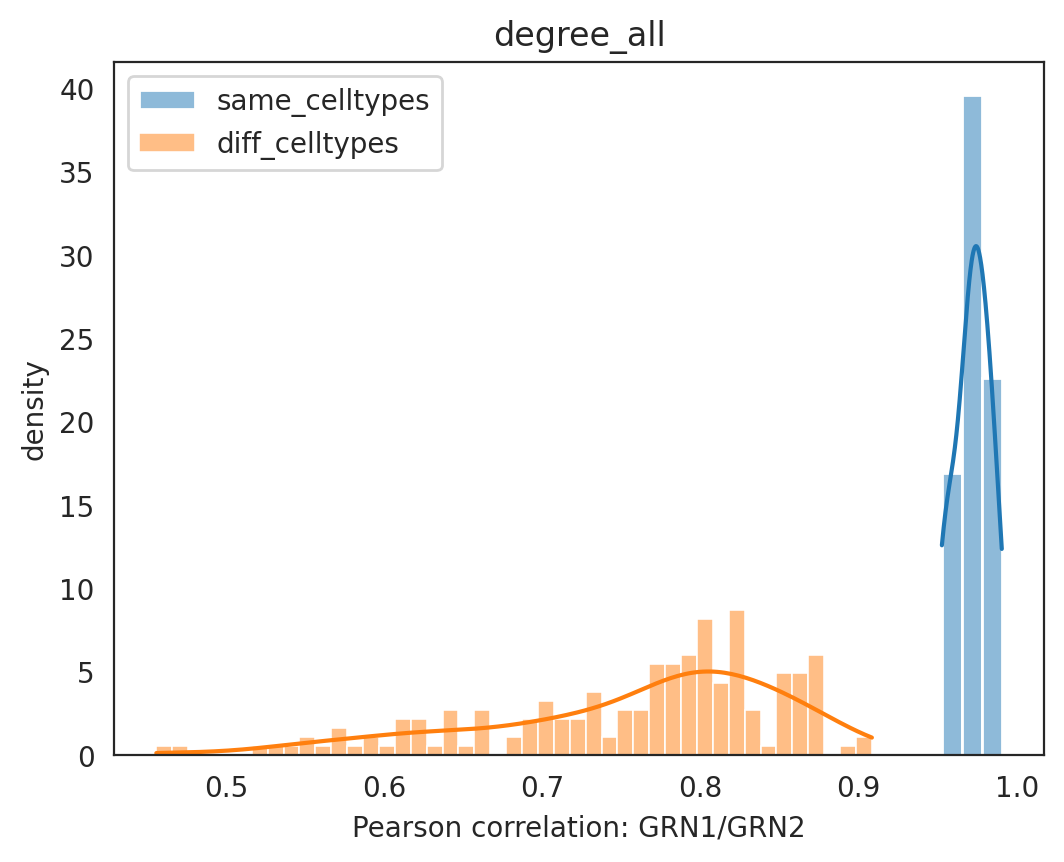

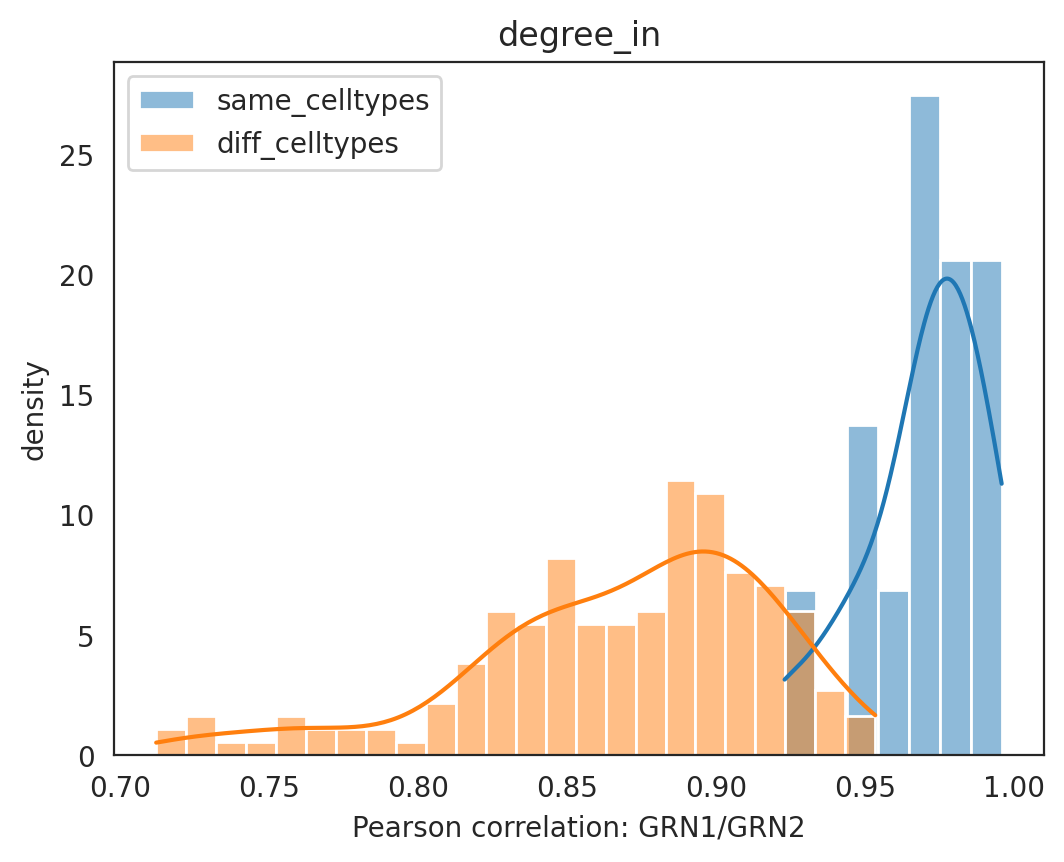

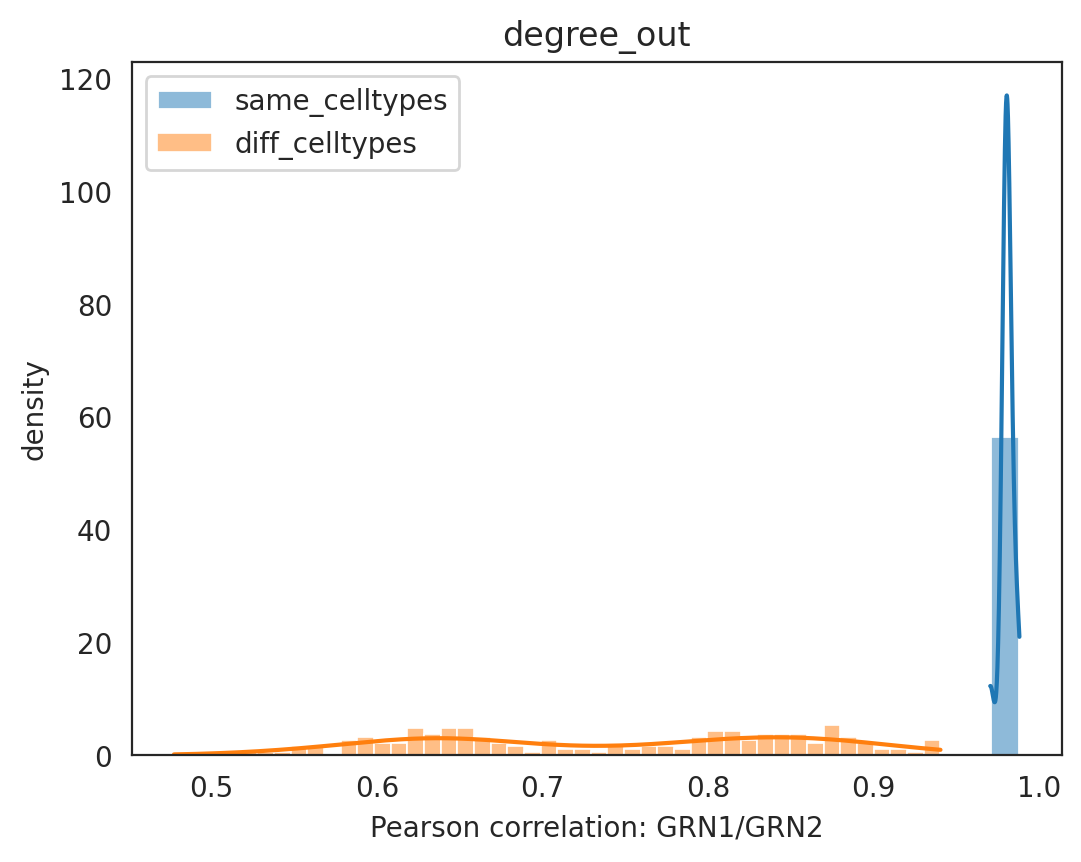

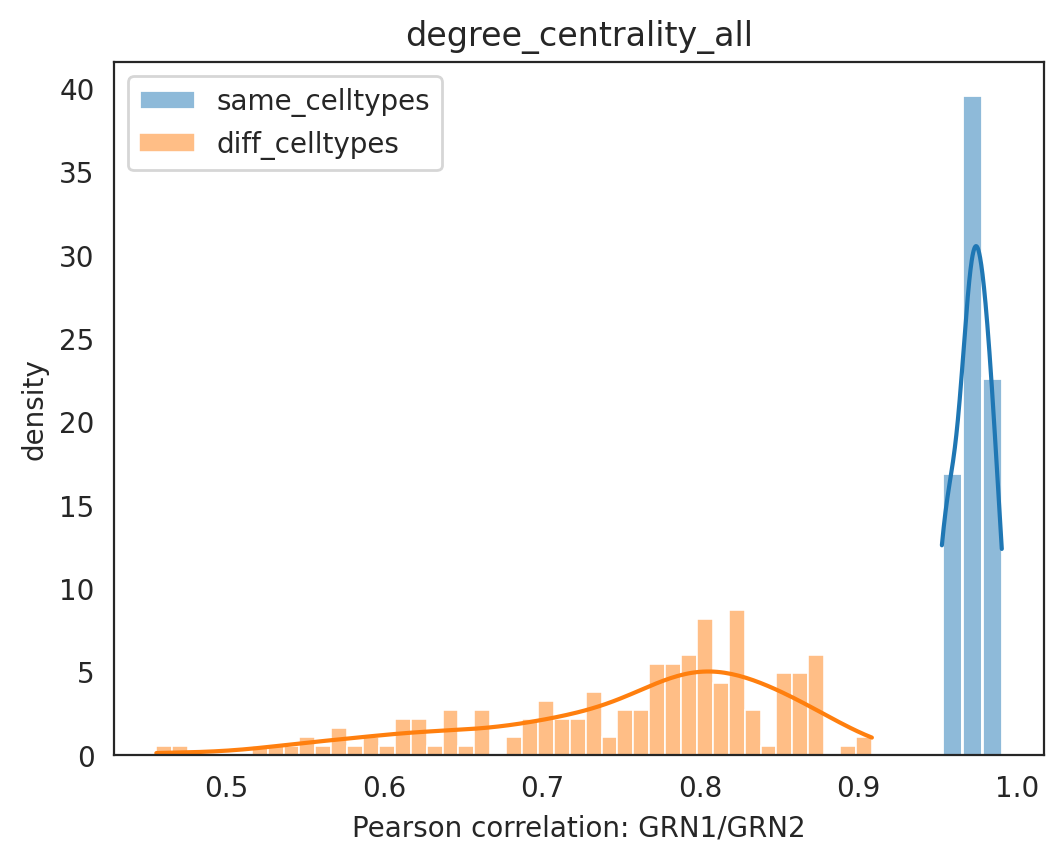

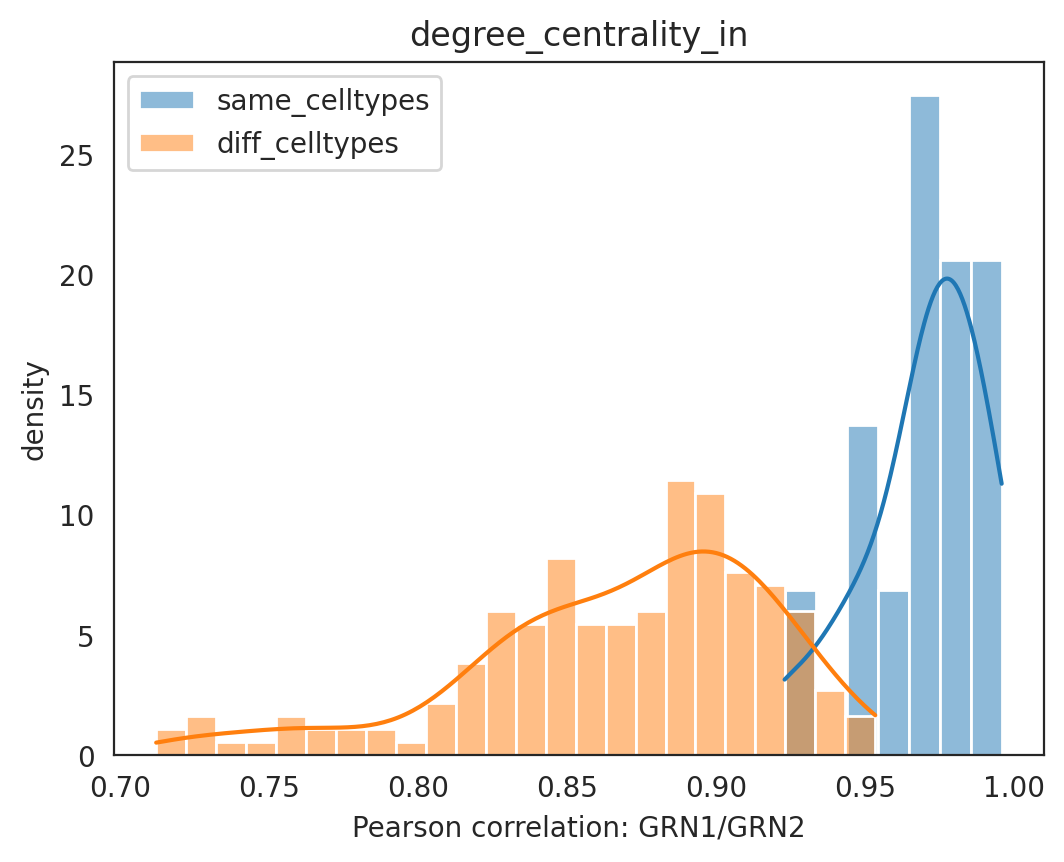

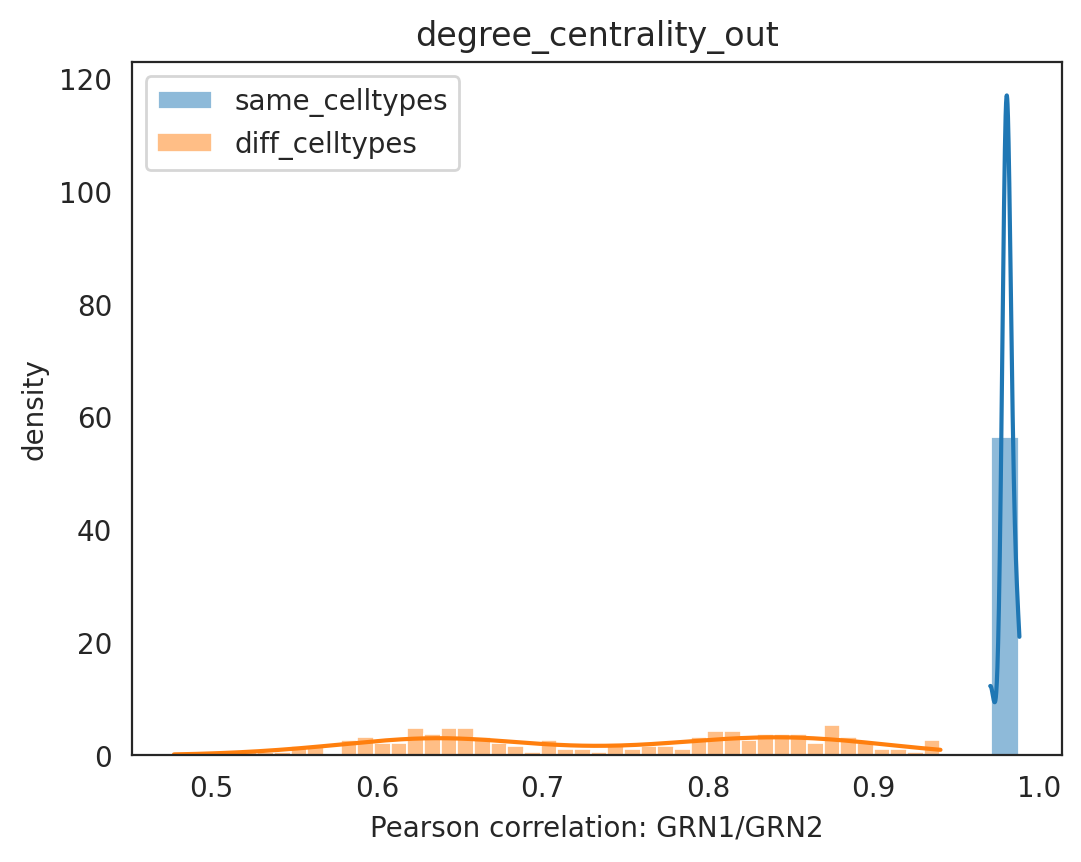

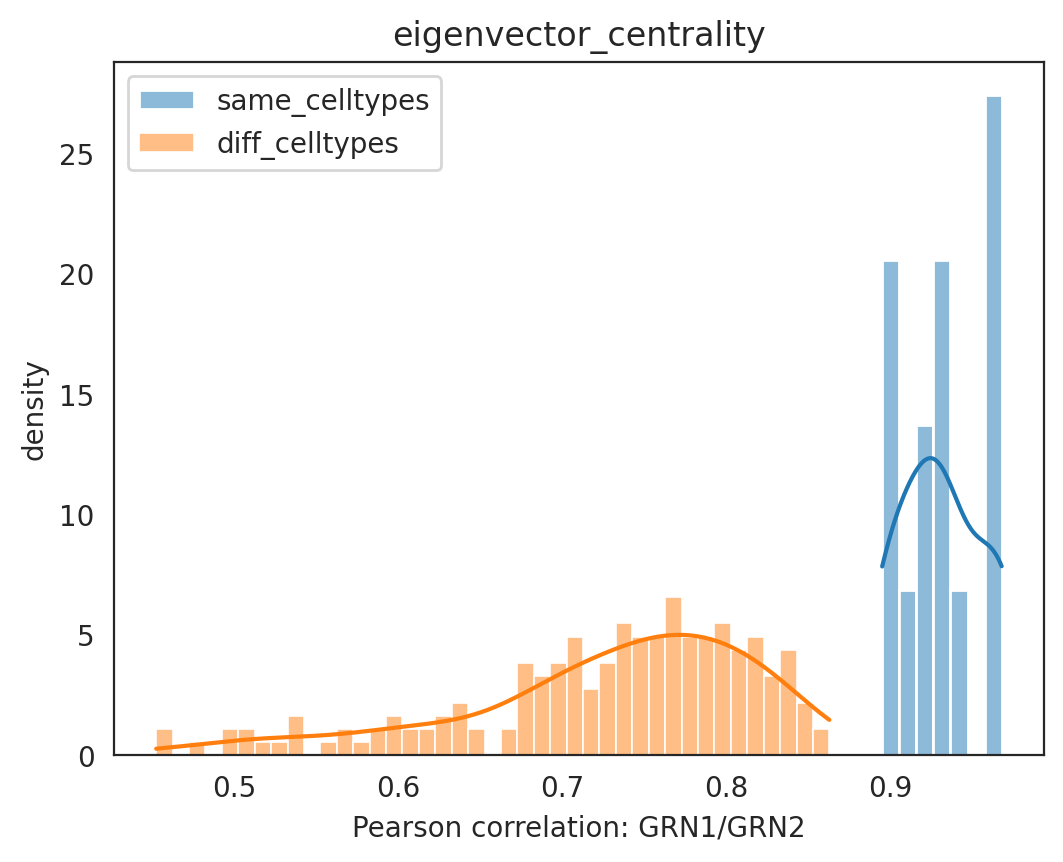

In [24]:
# define the cell-types
celltypes = ['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm',
       'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs',
       'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord',
       'PSM', 'Somites', 'unassigned']

# define the degree_metrics
degree_metrics = ["degree_all","degree_in","degree_out",
                  "degree_centrality_all","degree_centrality_in",
                  "degree_centrality_out","eigenvector_centrality"]

# define an empty dictionary to save the list of corr.coeff (per metric)
dict_corr_coeff = {}
# dict_corr_coeff["degree_centrality_all_same"] = corr_same_celltypes
# dict_corr_coeff['degree_centrality_all_diff'] = corr_diff_celltypes

# For loop to go over all degree metrics
for metric in degree_metrics:
    # define empty series to save the correlation coefficients
    corr_same_celltypes =[]
    corr_diff_celltypes = []

    for ct1 in celltypes:
        for ct2 in celltypes:
            corr_coeff = compute_corr_betwn_GRNs(df_GRN1, df_GRN2, ct1, ct2, metric)

            if ct1==ct2:
                corr_same_celltypes.append(corr_coeff)
            else:
                corr_diff_celltypes.append(corr_coeff)
                
    # define the keys for the dictionary
    namekey_same = metric + "_same"
    namekey_diff = metric + "_diff"
    # save the corr.coeff. into the dictionary
    dict_corr_coeff[namekey_same] = corr_same_celltypes
    dict_corr_coeff[namekey_diff] = corr_diff_celltypes
    
    # generate plots (optional)
    # define the bin width
    bin_width = 0.01

    # Calculate the number of bins for each histogram
    num_bins1 = int((max(corr_same_celltypes) - min(corr_same_celltypes)) / bin_width)
    num_bins2 = int((max(corr_diff_celltypes) - min(corr_diff_celltypes)) / bin_width)

    plt.figure()
    sns.histplot(corr_same_celltypes, kde=True, bins=num_bins1, stat="density", label='same_celltypes')
    sns.histplot(corr_diff_celltypes, kde=True, bins=num_bins2, stat="density", label='diff_celltypes')
    plt.xlabel("Pearson correlation: GRN1/GRN2")
    plt.ylabel("density")
    plt.title(metric)
    plt.legend()

    #plt.savefig("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/network_plots_TDR118/QC_corr_centrality_TDR118_TDR119_allCelltypes.pdf")
    plt.savefig(figpath + "QC_corr_" + metric + "_TDR118_TDR119_allCelltypes.pdf")
    plt.savefig(figpath + "QC_corr_" + metric + "_TDR118_TDR119_allCelltypes.png")
    plt.show()

### Step 3. generate a violin plot (or a boxplot showing the corr.coeff distribution for same/diff cell-types, for different metrics)



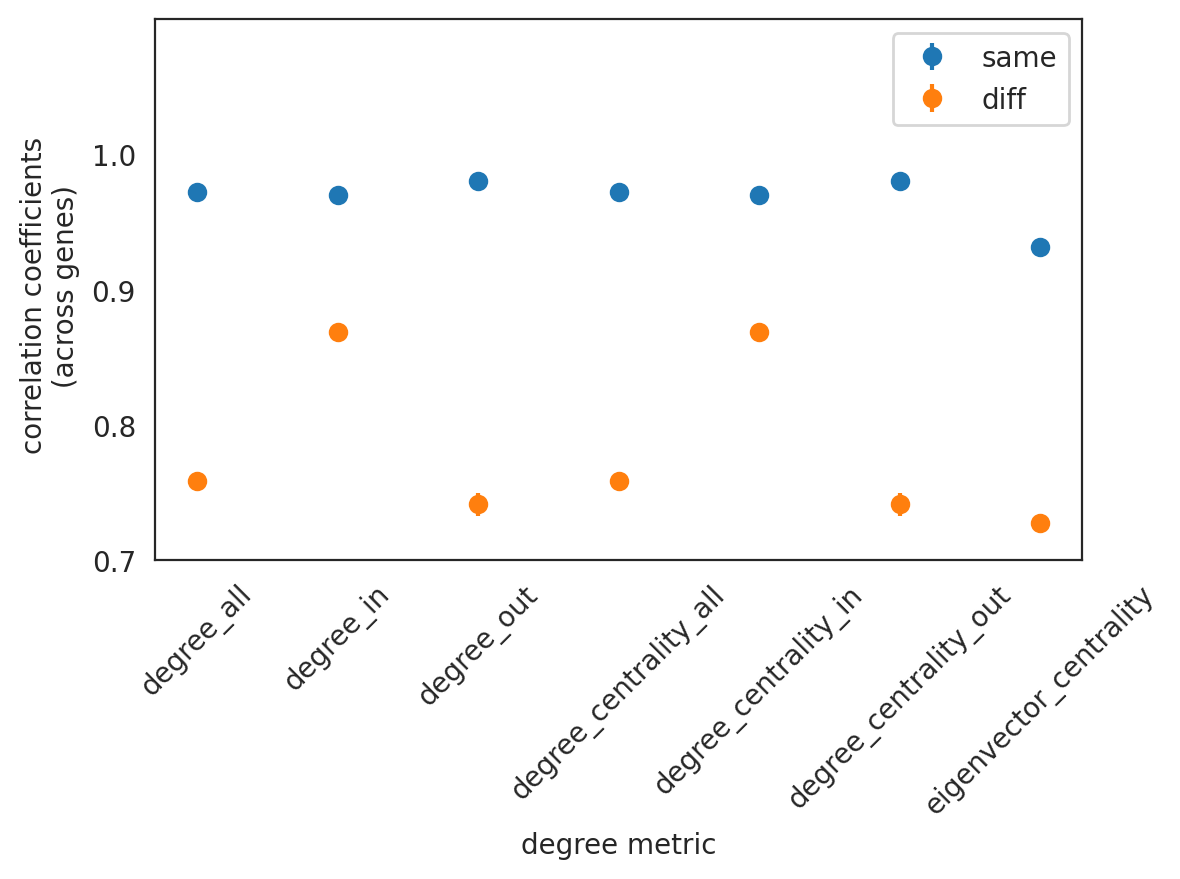

In [52]:
# A dictionary that has the distributions of corr.coeff., from all metrics
data = dict_corr_coeff
metric_names = degree_metrics

# Extract metric names and categories
# metric_names = list(set(key.split('_')[0] for key in data.keys()))
categories = ['same', 'diff']

# Compute means and standard errors for each metric and category
means = {}
std_errors = {}
for metric in metric_names:
    means[metric] = [np.mean(data[f'{metric}_{category}']) for category in categories]
    std_errors[metric] = [np.std(data[f'{metric}_{category}']) / np.sqrt(len(data[f'{metric}_{category}'])) for category in categories]

# Create x-values for each metric
x_values = np.arange(len(metric_names))

# Create a scatter plot with grouped data points and error bars
fig, ax = plt.subplots()

for i, category in enumerate(categories):
    y_values = [np.mean(data[f'{metric}_{category}']) for metric in metric_names]
    error_bar = [np.std(data[f'{metric}_{category}']) / np.sqrt(len(data[f'{metric}_{category}'])) for metric in metric_names]
    ax.errorbar(x_values, y_values, yerr=error_bar, marker='o', linestyle='None', label=category)

ax.set_xlabel('degree metric')
ax.set_ylabel('correlation coefficients \n (across genes)')
# ax.set_title('Mean Value with Standard Error (Grouped Scatter Plot with Error Bars)')
ax.set_xticks(x_values)
ax.set_yticks([0.7, 0.8, 0.9, 1])
ax.set_ylim([0.7, 1.1])
ax.set_xticklabels(metric_names, rotation = 45)
ax.legend(loc="upper right")

plt.tight_layout()
plt.savefig(figpath + "corr_coeff_all_degree_metrics_scatter.pdf")
plt.savefig(figpath + "corr_coeff_all_degree_metrics_scatter.png")
plt.show()

In [24]:
# Step 3: Find entries in new_df1 that are not in df1
merged = new_df1.merge(df1, left_index=True, right_index=True, how='left', indicator=True)
entries_not_in_df1 = merged[merged['_merge'] == 'left_only']
entries_not_in_df1

,degree_all_x,degree_in_x,degree_out_x,clustering_coefficient_x,clustering_coefficient_weighted_x,degree_centrality_all_x,degree_centrality_in_x,degree_centrality_out_x,betweenness_centrality_x,closeness_centrality_x,...,page_rank_y,assortative_coefficient_y,average_path_length_y,community_random_walk_y,module_y,connectivity_y,participation_y,role_y,cluster_y,_merge
neurod1,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
six2a,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
fam49al,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
spry4,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
ptprna,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
onecut1,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
egfl6,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
akap12b,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
tubb5,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
etv1,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
